## Workflow to analyze Photometry data

### Imports

In [1]:
# Import Session and Experiment class with helper functions
%load_ext autoreload
%autoreload 2 

# Import Session and Experiment class with helper functions
from trialexp.process.data_import import *

        if you want to export datasets to perform Maching Learning tasks.
        To solve, type pip install sktime in your environment


### Variables

In [2]:
import pandas as pd

trial_window = [-2000, 6000] # in ms

# time limit around trigger to perform an event
# determine successful trials
timelim = [0, 2000] # in ms

# Digital channel nb of the pyphotometry device
# on which rsync signal is sent (from pycontrol device)
rsync_chan = 2

basefolder, _ = os.path.split(os.getcwd())

# These must be absolute paths
# use this to use within package tasks files (in params)
tasksfile = os.path.join(basefolder,'params/tasks_params.csv')
# use this to put a local full path
#tasksfile = -r'C:/.../tasks_params.csv' 

photometry_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\test_folder\photometry'
video_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\videos'

### Tasks
- A tasks definition file (.csv) contains all the information to perform the extractions of behaviorally relevant information from **PyControl** files, for each **task** file. It includes what are the **triggers** of different trial types, what **events** to extract (with time data), and what are events or printed lines that could be relevant to determine the **conditions** (e.g: free reward, optogenetic stimulation type, etc.)
- To analyze a new task you need to append task characteristics like **task** filename, **triggers**, **events** and **conditions**

In [3]:
tasks = pd.read_csv(tasksfile, usecols = [1,2,3,4], index_col = False)
tasks

,task,triggers,events,conditions
0,lick_go_nogo,go; nogo,bar; bar_off; spout,free_reward
1,lick_go_nogo_unconditionned,go; nogo,bar; bar_off; spout,free_reward
2,lick_go_nogo_unconditionned_opto,go; nogo,bar; bar_off; spout,free_reward
3,reaching_go_nogo,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
4,reaching_go_nogo_jc,CS_plus; CS_minus,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
5,reaching_go_nogo_opto_continuous,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset; s_go_sham; s_go_...
6,reaching_go_nogo_opto_sinusoid,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset_2; s_nogo_cs_onse...
7,reaching_go_nogo_opto_sinusoid_spout,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset_2; s_nogo_cs_onse...
8,reaching_go_nogo_reversal,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
9,reaching_go_nogo_reversal_incentive,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...


### Create an experiment object

This will include all the pycontrol files present in the folder_path directory (do not include subdirectories)

In [4]:
# Folder of a full experimental batch, all animals included

# Enter absolute path like this
# pycontrol_files_path = r'T:\Data\head-fixed\test_folder\pycontrol'

# or this if you want to use data from the sample_data folder within the package
# pycontrol_files_path = os.path.join(basefolder,'sample_data/pycontrol')
pycontrol_files_path =r'\\ettin\Magill_Lab\Julien\Data\head-fixed\kms_pycontrol'
# Load all raw text sessions in the indicated folder or a sessions.pkl file
# if already existing in folder_path
exp_cohort = Experiment(pycontrol_files_path)

# Only use if the Experiment cohort as been processed by trials before
# TODO: assess whether this can be removed or not
exp_cohort.by_trial = True


Saved sessions loaded from: sessions.pkl


### Perform extraction of behavioural information by trial

In [5]:
# Process the whole experimental folder by trials
exp_cohort.process_exp_by_trial(trial_window, timelim, tasksfile)

# Save the file as sessions.pkl in folder_path
exp_cohort.save()

reaching_go_spout_cued_uncued 41 2022-05-16 13:27:41 1 0
reaching_go_spout_cued_uncued 46 2022-05-16 13:27:41 1 0
reaching_go_spout_cued_uncued 41 2022-05-16 14:04:35 0 0
file too short to process (likely aborted session):                 46 2022-05-16 14:04:35 reaching_go_spout_cued_uncued
file too short to process (likely aborted session):                 45 2022-05-17 17:02:55 pavlovian_nobar_nodelay
file too short to process (likely aborted session):                 41 2022-05-20 16:25:41 reaching_go_spout_cued_uncued
file too short to process (likely aborted session):                 42 2022-05-20 16:25:41 reaching_go_spout_cued_uncued
file too short to process (likely aborted session):                 41 2022-05-20 16:26:15 reaching_go_spout_cued_uncued
file too short to process (likely aborted session):                 42 2022-05-20 16:26:15 reaching_go_spout_cued_uncued
file too short to process (likely aborted session):                 41 2022-05-20 16:27:12 reaching_go_spout_

In [9]:
sessions = exp_cohort.get_sessions(subject_IDs=46)
sessions[0].df_events


,timestamp,trigger,valid,success,bar_trial_time,bar_off_trial_time,spout_trial_time
trial_nb,,,,,,,
1,3583,cued,True,False,"[714, 1999, 2069, 2644, 3356, 3410, 4053]","[644, 730, 2014, 2592, 2899, 3371, 4017]","[659, 861, 1040, 1184, 1314, 1502, 1701, 2984,..."
2,10546,cued,True,False,[],[],[]
3,25108,cued,True,False,"[5362, 5456, 5843, 5934, 6761, 6879, 7257, 755...","[5332, 5440, 5813, 5918, 6719, 6849, 7221, 751...",[]
4,38566,cued,True,False,[],[],[]
5,51112,cued,True,False,[],[],[]


### Define conditions and groups for extraction

In [34]:
# Defime each trial type as a dictionary of conditions to be met
# Defime each trial type as a dictionary of conditions to be met
conditions_dict1 = {'trigger': 'CS_Go', 'valid': True, 'success': True, 'error bar_off': False, 'reward free': False, 'button_press': False}
conditions_dict2 = {'trigger': 'CS_Go', 'valid': True, 'success': False, 'error bar_off': False, 'reward free': False, 'button_press': False}
conditions_dict3 = {'trigger': 'CS_NoGo', 'valid': True, 'success': True, 'button_press': False}
conditions_dict4 = {'trigger': 'CS_NoGo', 'valid': True, 'success': False, 'button_press': False}
# Aggregate all condition dictionaries in a list
condition_list = [conditions_dict1, conditions_dict2, conditions_dict3, conditions_dict4]
# Aliases for conditions
cond_aliases = ['Go hit', 'Go miss', 'NoGo hit', 'NoGo miss']
# Groups as a list of lists
# groups = [[280, 281, 282, 289],[295, 282, 284, 285, 292, 297]]
groups = None

# Window to exctract (in ms)
trial_window = [-2000, 6000]

Another example, for Go-NoGo optogenetic protocol

In [117]:
conditions_dict0 = {'trigger': 'CS_Go', 'valid': True, 's_go_sham': True}
conditions_dict1 = {'trigger': 'CS_Go', 'valid': True, 's_go_cs_onset': True}
conditions_dict2 = {'trigger': 'CS_Go', 'valid': True, 's_go_bar_off': True}
conditions_dict3 = {'trigger': 'CS_Go', 'valid': True, 's_go_spout': True}
conditions_dict4 = {'trigger': 'CS_Go', 'valid': True, 's_go_error_sham': True}
conditions_dict5 = {'trigger': 'CS_Go', 'valid': True, 's_go_error_bar_off': True}
conditions_dict6 = {'trigger': 'CS_NoGo', 'valid': True, 's_nogo_sham': True}
conditions_dict7 = {'trigger': 'CS_NoGo', 'valid': True, 's_nogo_cs_onset': True}

# Aggregate all condition dictionaries in a list
condition_list = [conditions_dict0, conditions_dict1, conditions_dict2, conditions_dict3, \
    conditions_dict4, conditions_dict5, conditions_dict6, conditions_dict7]
# Aliases for conditions
cond_aliases = ['Go sham', 'Go onset', 'Go bar release', \
    'Go spout', 'Go error sham', 'Go error bar_off', 'NoGo sham', 'NoGo onset']
# Groups as a list of lists
groups = [[280, 282, 283, 294, 295, 299, 300, 301, 302, 303, 304, 305],\
    [284, 285, 296, 297, 306, 307],[289,290,291,292,293]]

# right_handed = [281]
# groups = [[280, 282, 299, 300, 301],\
#     [284, 285, 296, 297, 306, 307]]
# Window to exctract (in ms)
trial_window = [-2000, 6000]

Example in progress for Cued-Uncued

In [35]:
# List of uncued conditions as listed on the tasks .csv file for task reaching_go_spout_cued_uncued:
# free_reward_timer; reward spout cued; reward bar cued; reward bar_off; reward spout uncued; reward bar uncued; reward free; reward free_uncued

# Many combinations possible
conditions_dict0 = {'trigger': 'cued', 'valid': True, 'reward spout cued': True, 'free_reward_timer': False, 'success': True}
conditions_dict1 = {'trigger': 'cued', 'valid': True, 'reward bar cued': True, 'free_reward_timer': False, 'success': True}
conditions_dict2 = {'trigger': 'cued', 'valid': True, 'success': False}
conditions_dict3 = {'trigger': 'uncued', 'valid': True, 'success': False}
conditions_dict4 = {'trigger': 'uncued', 'valid': True, 'reward spout uncued': True, 'free_reward_timer': False, 'success': True}
conditions_dict5 = {'trigger': 'uncued', 'valid': True, 'reward bar cued': True, 'free_reward_timer': False, 'success': True}

# Aggregate all condition dictionaries in a list
condition_list = [conditions_dict0, conditions_dict1, conditions_dict2, conditions_dict3, \
    conditions_dict4, conditions_dict5]
# Aliases for conditions
cond_aliases = ['Cued spout hit', 'Cued bar hit', 'Cued miss', \
    'Uncued miss', 'Uncued spout hit', 'Uncued bar hit']
# Groups as a list of lists
groups = None

# right_handed = [281]
# groups = [[280, 282, 299, 300, 301],\
#     [284, 285, 296, 297, 306, 307]]
# Window to exctract (in ms)
trial_window = [-2000, 30000]

Example in progress for pavlovian_nobar_nodelay

In [9]:
# List of uncued conditions as listed on the tasks .csv file for task reaching_go_spout_cued_uncued:
# free_reward_timer; reward spout cued; reward bar cued; reward bar_off; reward spout uncued; reward bar uncued; reward free; reward free_uncued

# Many combinations possible
conditions_dict0 = {'success': True, 'valid': True}
conditions_dict1 = {'success': False, 'valid': True}

# Aggregate all condition dictionaries in a list
condition_list = [conditions_dict0, conditions_dict1]
# Aliases for conditions
cond_aliases = ['hit','miss']
# Groups as a list of lists
groups = None

# right_handed = [281]
# groups = [[280, 282, 299, 300, 301],\
#     [284, 285, 296, 297, 306, 307]]
# Window to exctract (in ms)


Behaviour: Create a dataset

In [19]:
ev_dataset = exp_cohort.behav_events_to_dataset(
        groups = groups,
        conditions_list = condition_list, 
        cond_aliases = cond_aliases, 
        when = 'all', 
        task_names = 'pavlovian_nobar_nodelay',  # 'reaching_go_nogo',
        trig_on_ev = None)

ev_dataset.set_trial_window(trial_window=trial_window, unit='milliseconds')
ev_dataset.set_conditions(conditions=condition_list, aliases=cond_aliases)


caca
pipi
pipi
pipi


KeyError: 'condition_ID'

Behaviour: Compute distribution

In [37]:
dist_as_continuous = ev_dataset.compute_distribution(
        trial_window = [-2000, 30000],
        bin_size = 1000, # do not work as expected with cued-uncued
        normalize = True,
        per_session = False,
        out_as_continuous = True)
dist_as_continuous.set_conditions(conditions=condition_list, aliases=cond_aliases)
# Remove test files
dist_as_continuous.filter_subjects([0,1])

### Optional methods

- Implementation of these optional filtering options is first understood as removing subjects, groups, conditions...
- It is a non-permanent way of discarding elements for analysis
- It is based on a "keep" column in the metadata that is True by default and set to False with the filtering function.
- At anytime, <trial_dataset>.filter_reset() can be called to re-include all the elements in the analysis (set all "keep" to True)
- Comment or uncomment lines and fill the lists according to your needs

In [13]:
# Get a list of the groups
dist_as_continuous.get_groups()
# Get a list of the variables
dist_as_continuous.get_col_names()

# reset previous filtering of the dataset
dist_as_continuous.filter_reset()

# exclude some conditions by IDs
dist_as_continuous.filter_conditions([])

# exclude some groups by IDs
dist_as_continuous.filter_groups([])

# exclude some subjects
dist_as_continuous.filter_subjects([0, 1])
#     subjects_IDs_to_exclude = [289, 290, 293, 294, 295, 299, 301, 303, 304, 305, 306])

# filter subjects/sessions with less than x trials (by condition)
#dist_as_continuous.filter_min(min_trials = 1)

# To remove subjects who do not have trials
# in all the conditions, if called after filter_min(),
# will discard any subject who do not have the minimum number
# of trials in all the conditions

# dist_as_continuous.filter_if_not_in_all_cond()


Indicative preview of the behavioural metadata

In [38]:
dist_as_continuous.metadata_df.head(50)

,condition_ID,group_ID,subject_ID,bar_trial_time,bar_off_trial_time,spout_trial_time,trial_ID,bar_dist,bar_off_dist,spout_dist,keep
0,2,0,41,"[12910.0, 474176.0, 474280.0, 474350.0, 474387...","[12925.0, 474192.0, 474295.0, 474365.0, 474406...","[1589.0, 1161.0, 1237.0, 2827.0, 2903.0, 846.0...",0,"[0.3503898635477583, 0.0, 0.12183235867446393,...","[0.24610136452241715, 0.0, 0.2894736842105263,...","[0.21101364522417154, 0.17543859649122806, 0.5...",True
1,2,0,42,"[1605.0, 5054.0, 5117.0, 10597.0, 136967.0, 13...","[1620.0, 5070.0, 5132.0, 10612.0, 136989.0, 13...","[2498.0, 1270.0, 911.0, 968.0, 1338.0, 3027.0,...",1,"[0.9378197560015742, 0.0003935458480913026, 0....","[0.6528925619834711, 0.0, 1.003935458480913, 0...","[0.45611963793781973, 0.17079889807162535, 1.9...",True
2,2,0,43,"[1314.0, 11256.0, 3059.0, 3159.0, 8486.0, 7730...","[1128.0, 11241.0, 1738.0, 3076.0, 8440.0, 7708...","[1998.0, 2025.0, 2159.0, 2176.0, 2331.0, 2355....",2,"[0.8584686774941995, 0.0, 0.19721577726218098,...","[0.6233565351894819, 0.0, 0.5359628770301624, ...","[0.41531322505800466, 0.262954369682908, 1.088...",True
3,2,0,44,"[11533.0, 11625.0, 11841.0, 11882.0, 11996.0, ...","[11610.0, 11826.0, 11867.0, 11976.0, 12012.0, ...","[856.0, 931.0, 1171.0, 1246.0, 2490.0, 2565.0,...",3,"[0.6874310915104741, 0.0, 0.1681367144432194, ...","[0.4492833517089305, 0.0, 0.42861080485115766,...","[0.45369349503858875, 0.49173098125689085, 1.0...",True
4,2,0,45,"[5306.0, 5609.0, 5908.0, 2320.0, 13526.0, 1418...","[5493.0, 5665.0, 2305.0, 13490.0, 14167.0, 203...","[2546.0, 795.0, -521.0, 976.0, 2330.0, 5879.0,...",4,"[0.0, 0.0, 0.1906779661016949, 0.4152542372881...","[0.0, 0.0, 0.19915254237288135, 0.432203389830...","[0.8559322033898306, 0.8432203389830508, 0.805...",True
5,2,0,46,"[658.0, 681.0, 3219.0, 3292.0, 3352.0, 3425.0,...","[619.0, 673.0, 785.0, 3234.0, 3321.0, 3406.0, ...","[1108.0, 1207.0, 1776.0, 2688.0, 912.0, 1838.0...",5,"[0.09983361064891846, 0.0, 0.11813643926788686...","[0.09151414309484193, 0.0, 0.16472545757071547...","[0.04658901830282862, 0.0066555740432612314, 0...",True
6,2,0,47,"[7881.0, -1662.0, -1060.0, 2989.0, 3352.0, -14...","[7865.0, -1687.0, -1093.0, 2974.0, 3316.0, -15...","[7874.0, -1662.0, -1060.0, 2990.0, 3352.0, -14...",6,"[1.166887417218543, 0.0, 0.9033112582781457, 0...","[0.8728476821192053, 0.0, 1.3735099337748344, ...","[0.8913907284768212, 0.0013245033112582781, 0....",True
7,2,0,48,"[622.0, -1478.0, -1412.0, -1392.0, -1022.0, 48...","[637.0, -1427.0, -1407.0, -1038.0, 4395.0, 488...","[2003.0, 2943.0, 3019.0, 2533.0, 2609.0, 2545....",7,"[0.3438520130576714, 0.04787812840043525, 0.12...","[0.22306855277475518, 0.023939064200217627, 0....","[0.3601741022850925, 0.3928182807399347, 0.556...",True
8,2,0,49,"[2466.0, 3509.0, 1928.0, 2142.0, 2229.0, 1530....","[1966.0, 2902.0, 1893.0, 2112.0, 1351.0, 1113....","[2454.0, 2366.0, 997.0, 1076.0, 2012.0, 2747.0...",8,"[0.5025380710659898, 0.0, 0.09238578680203045,...","[0.35634517766497464, 0.0, 0.14416243654822336...","[0.27918781725888325, 0.4984771573604061, 0.52...",True
9,2,0,50,"[1052.0, 1361.0, 1692.0, 2014.0, 967.0, 1829.0...","[1018.0, 1068.0, 1636.0, 1994.0, 934.0, 1032.0...","[1052.0, 1692.0, 1021.0, 6383.0, 6492.0, -1458...",9,"[1.2, 0.0, 0.21, 0.58, 0.78, 0.53, 0.36, 0.47,...","[0.97, 0.0, 0.29, 0.64, 0.8, 0.56, 0.4, 0.45, ...","[1.07, 0.0, 0.19, 0.54, 0.7, 0.47, 0.39, 0.43,...",True


Behaviour: Plot distribution

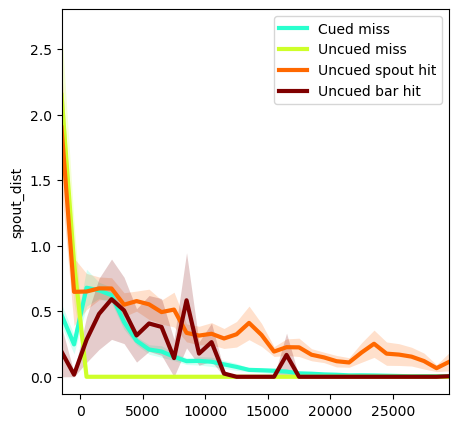

True    41
Name: keep, dtype: int64

In [39]:
dist_as_continuous.lineplot(
    vars = [ 'spout_dist'],
    time_lim = None,
    error = True,
    ylim = None,#[[-0.1,1.6]], #[[-0.1, 0.7]], #[[-0.1, 1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
    colormap = 'jet',
    legend = True,
    plot_subjects = False,
    plot_groups = True,
    figsize = (5,5),
    dpi = 100,
    verbose = False)
# Return a count of overall number of trials
dist_as_continuous.metadata_df['keep'].value_counts()

### Set DeepLabCut bodyparts to compute paws centroids

In [158]:
# Name of the labelled body parts from both upper limbs
# The bodyparts from which we draw here are user-defined
# when creating a new DeepLabCut project (config.yaml)

L_paw_parts  = ['MCP II', 'MCP III', 'MCP IV', 'MCP V', 'IP II', 'IP III', \
    'IP IV', 'IP V', 'tip II', 'tip III', 'tip IV', 'tip V'] 

R_paw_parts = ['r MCP II', 'r MCP III', 'r MCP IV', 'r MCP V', 'r IP II', \
    'r IP III', 'r IP IV', 'r IP V', 'r tip II', 'r tip III', 'r tip IV', 'r tip V']

names_of_ave_regions = ['Left_paw','Right_paw']

### Extract DeepLabCut trials and create a Continuous_Dataset

In [ ]:
cont_dataset = exp_cohort.get_deeplabcut_groups(
        groups = None,
        conditions_list = condition_list,
        cond_aliases = cond_aliases,
        when='all', 
        task_names = ['reaching_go_nogo'],
        bodyparts_to_ave = [L_paw_parts, R_paw_parts],
        names_of_ave_regions = ['Left_paw','Right_paw'], 
        bodyparts_to_store = ['spout', 'jaw', 'ear', 'tongue', 'tip III',  'IP III', 'MCP III'],
        normalize_between = ['Left_paw', 'spout'],
        bins_nb = 100,
        three_dims = False, 
        p_thresh = 0.9,
        camera_fps = 100, # not yet functional
        camera_keyword = 'Side', 
        trig_on_ev = None, 
        verbose = True)


### Save DLC Dataset

In [338]:
folder_path = r'C:\Users\phar0732\Documents\GitHub\pycontrol_share\outputs'

cont_dataset.save(folder_path, 'DLC_dataset_gonogo')

PicklingError: Can't pickle <class 'trial_dataset_classes.Continuous_Dataset'>: it's not the same object as trial_dataset_classes.Continuous_Dataset

### Reload a pre-existing dataset

In [110]:
dataset_full_path = r'C:\Users\phar0732\Documents\GitHub\pycontrol_share\outputs\DLC_dataset_opto_continuous_full.pkl'
cont_dataset = load_dataset(dataset_full_path)

In [111]:
cont_dataset.metadata_df

,subject_ID,datetime,task_name,condition_ID,trial_nb,session_nb,group_ID,keep,trial_ID
0,280,2021-11-18 15:11:25,reaching_go_nogo_opto_continuous,0,8,34,0,False,0
1,280,2021-11-18 15:11:25,reaching_go_nogo_opto_continuous,0,11,34,0,False,1
2,280,2021-11-18 15:11:25,reaching_go_nogo_opto_continuous,0,12,34,0,False,2
3,280,2021-11-18 15:11:25,reaching_go_nogo_opto_continuous,0,19,34,0,False,3
4,280,2021-11-18 15:11:25,reaching_go_nogo_opto_continuous,0,22,34,0,False,4
...,...,...,...,...,...,...,...,...,...
9114,293,2022-01-21 15:31:54,reaching_go_nogo_opto_continuous,7,60,37,2,False,9114
9115,293,2022-01-21 15:31:54,reaching_go_nogo_opto_continuous,7,64,37,2,False,9115
9116,293,2022-01-21 15:31:54,reaching_go_nogo_opto_continuous,7,142,37,2,False,9116
9117,293,2022-01-21 15:31:54,reaching_go_nogo_opto_continuous,7,144,37,2,False,9117


### Optional methods

In [374]:
# Get a list of the groups
cont_dataset.get_groups()
# Get a list of the variables
cont_dataset.get_col_names()

# reset previous filtering of the dataset
cont_dataset.filter_reset()

# exclude some conditions by IDs
cont_dataset.filter_conditions([])

# exclude some groups by IDs
cont_dataset.filter_groups([])

# exclude some subjects
cont_dataset.filter_subjects([0, 1,289,299,305,306])
#     subjects_IDs_to_exclude = [289, 290, 293, 294, 295, 299, 301, 303, 304, 305, 306])

# filter subjects/sessions with less than x trials (by condition)
cont_dataset.filter_min(min_trials = 10)

# To remove subjects who do not have
# trials in all the conditions
# cont_dataset.filter_if_not_in_all_cond()

# method to build (not finished)
# cont_dataset.set_groups()


In [375]:
%load_ext autoreload
%autoreload 2

from trial_dataset_classes import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


 conditions Int64Index([0, 1, 2, 3], dtype='int64', name='condition_ID') groups Int64Index([0], dtype='int64', name='group_ID')


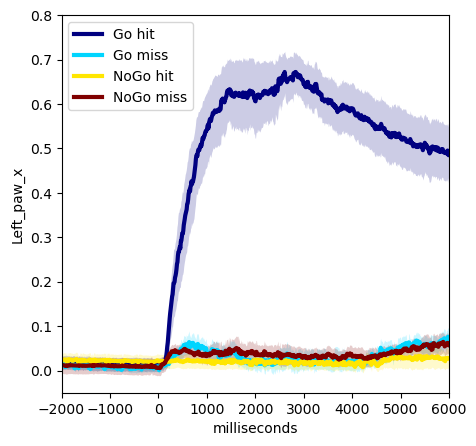

True     2800
False     628
Name: keep, dtype: int64

In [378]:
### Plot the photometry by condition
cont_dataset.set_trial_window([-2, 6], 's')
cont_dataset.set_conditions(condition_list, cond_aliases)
cont_dataset.lineplot(
    vars = ['Left_paw_x'],
    time_lim = [-2000, 6000],
    time_unit = 'milliseconds',
    error = True,
    ylim = [[-0.05, 0.8]], #[[-0.1, 1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
    colormap = 'jet',
    legend = True,
    plot_subjects = False,
    plot_groups = True,
    figsize = (5,5),
    dpi = 100,
    verbose = False)

# Return a count of overall number of trials
cont_dataset.metadata_df['keep'].value_counts()


In [ ]:
%load_ext autoreload
%autoreload 2
cont_dataset.set_groups(groups)

In [276]:
cont_dataset.metadata_df.keep[cont_dataset.metadata_df.subject_ID == 307].value_counts()

True     308
False    233
Name: keep, dtype: int64

In [177]:
for row in cont_dataset.metadata_df.itertuples():
    print(row.group_ID)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [171]:
row

Pandas(Index=0, subject_ID=0, datetime=Timestamp('2021-11-18 14:37:48'), task_name='reaching_go_nogo_opto_continuous', condition_ID=0, trial_nb=4, session_nb=160, group_ID=0, keep=False, trial_ID=0)

In [172]:
row.subject_ID

0